In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Verify dataset shape
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


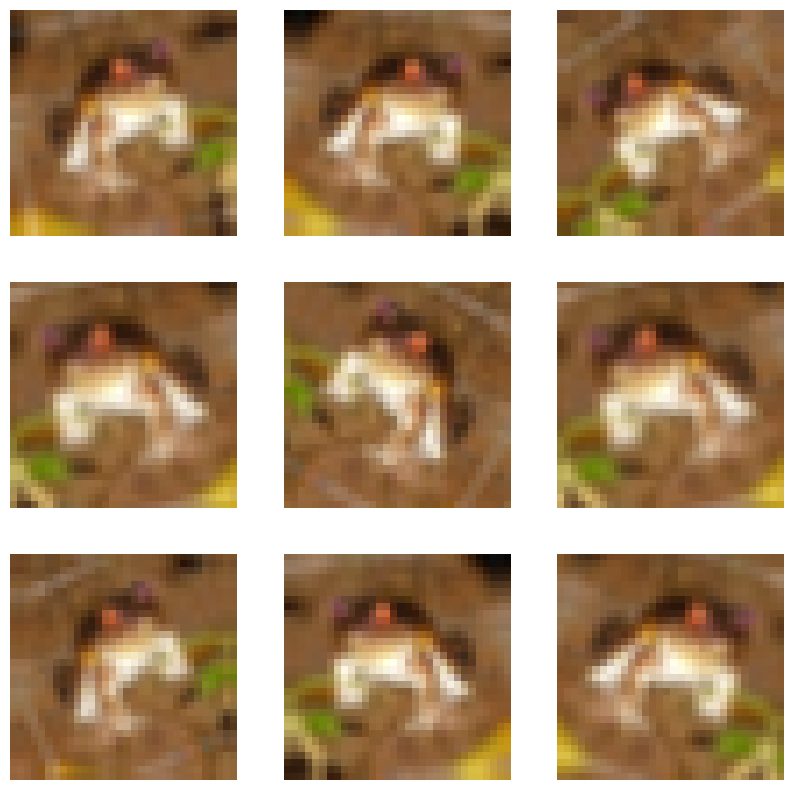

In [3]:
from tensorflow.keras import layers, models

# Create data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

# Visualize augmented images
plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = data_augmentation(tf.expand_dims(train_images[0], 0))
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")
plt.show()

In [4]:
def build_cnn_model(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential([
        # Input layer with data augmentation
        layers.Input(shape=input_shape),
        data_augmentation,

        # First convolutional block
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.2),

        # Second convolutional block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        # Third convolutional block
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        # Fully connected layers
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

# Build and compile the model
cnn_model = build_cnn_model()
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Display model architecture
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,02

 Total params: 816,938 (3.12 MB)

 Trainable params: 815,530 (3.11 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [5]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [6]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, dropout_rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.mlp = tf.keras.Sequential([
            layers.Dense(embed_dim * 2, activation=tf.nn.gelu),
            layers.Dropout(dropout_rate),
            layers.Dense(embed_dim),
            layers.Dropout(dropout_rate)
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(dropout_rate)
        self.dropout2 = layers.Dropout(dropout_rate)

    def call(self, inputs, training=False):  # Add training flag with default
        # Self-attention
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)

        # MLP
        mlp_output = self.mlp(out1)
        mlp_output = self.dropout2(mlp_output, training=training)
        return self.layernorm2(out1 + mlp_output)

In [7]:
def build_vit_model(input_shape=(32, 32, 3),
                   patch_size=4,
                   projection_dim=64,
                   num_heads=4,
                   transformer_layers=8,
                   mlp_head_units=[128],
                   num_classes=10):
    inputs = layers.Input(shape=input_shape)

    # Augment data
    augmented = data_augmentation(inputs)

    # Create patches
    patches = Patches(patch_size)(augmented)

    # Calculate number of patches
    num_patches = (input_shape[0] // patch_size) ** 2

    # Encode patches
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple transformer blocks
    for _ in range(transformer_layers):
        encoded_patches = TransformerBlock(projection_dim, num_heads)(encoded_patches)

    # Create MLP head
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.GlobalAveragePooling1D()(representation)
    representation = layers.Dropout(0.5)(representation)

    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)

    # Classify outputs
    logits = layers.Dense(num_classes)(features)

    # Create model
    model = tf.keras.Model(inputs=inputs, outputs=logits)
    return model

# Build ViT model
vit_model = build_vit_model()

# Use learning rate with warmup for better training
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate, decay_steps=1000, alpha=0.1)

vit_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])

# Display model architecture
vit_model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ patches (Patches)               │ (None, None, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ patch_encoder (PatchEncoder)    │ (None, 64, 64)         │         7,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block               │ (None, 64, 64)         │        83,200 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_1             │ (None, 64, 64)         │        83,200 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_2             │ (None, 64, 64)         │        83,200 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_3             │ (None, 64, 64)         │        83,200 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_4             │ (None, 64, 64)         │        83,200 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_5             │ (None, 64, 64)         │        83,200 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_6             │ (None, 64, 64)         │        83,200 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_7             │ (None, 64, 64)         │        83,200 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_16          │ (None, 64, 64)         │           128 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 682,570 (2.60 MB)

 Trainable params: 682,570 (2.60 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train CNN model
cnn_history = cnn_model.fit(
    train_images, train_labels,
    batch_size=128,
    epochs=100,
    validation_data=(test_images, test_labels),
    callbacks=[early_stopping, reduce_lr]
)

# Train ViT model
vit_history = vit_model.fit(
    train_images, train_labels,
    batch_size=128,
    epochs=100,
    validation_data=(test_images, test_labels),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.3112 - loss: 2.2336 - val_accuracy: 0.2824 - val_loss: 2.3091 - learning_rate: 0.0010
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.4831 - loss: 1.4373 - val_accuracy: 0.4751 - val_loss: 1.5788 - learning_rate: 0.0010
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.5625 - loss: 1.2326 - val_accuracy: 0.6039 - val_loss: 1.1156 - learning_rate: 0.0010
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.6029 - loss: 1.1187 - val_accuracy: 0.6501 - val_loss: 0.9859 - learning_rate: 0.0010
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.6366 - loss: 1.0296 - val_accuracy: 0.6280 - val_loss: 1.0837 - learning_rate: 0.0010
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.6630 - loss: 0.9607 - val_accuracy: 0.6671 - val_loss: 0.9733 - learning_rate: 0.0010
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.6

TypeError: This optimizer was created with a `LearningRateSchedule` object as its `learning_rate` constructor argument, hence its learning rate is not settable. If you need the learning rate to be settable, you should instantiate the optimizer with a float `learning_rate` argument.

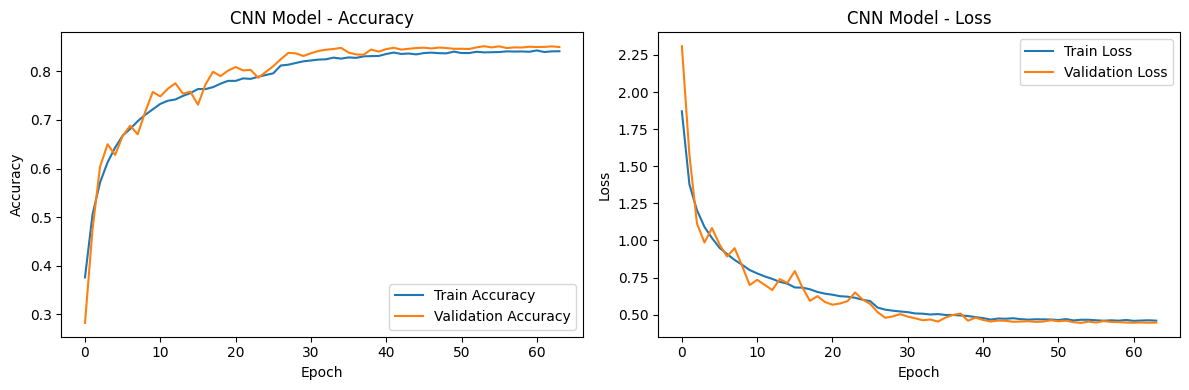

NameError: name 'vit_history' is not defined

In [9]:
def plot_history(history, title):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(cnn_history, 'CNN Model')
plot_history(vit_history, 'ViT Model')

CNN Evaluation:
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


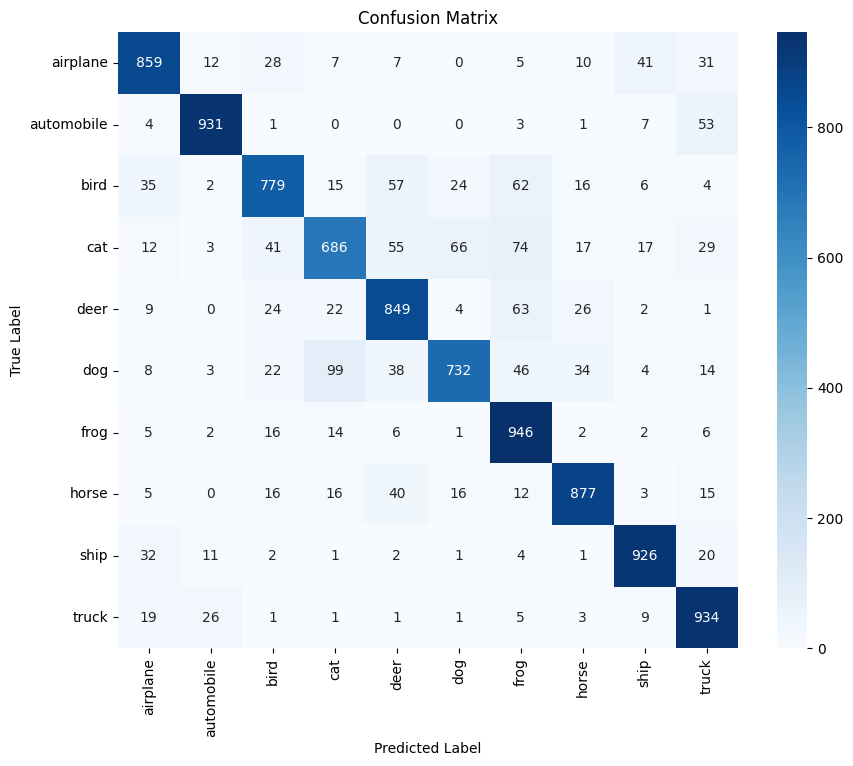

              precision    recall  f1-score   support

    airplane       0.87      0.86      0.86      1000
  automobile       0.94      0.93      0.94      1000
        bird       0.84      0.78      0.81      1000
         cat       0.80      0.69      0.74      1000
        deer       0.80      0.85      0.83      1000
         dog       0.87      0.73      0.79      1000
        frog       0.78      0.95      0.85      1000
       horse       0.89      0.88      0.88      1000
        ship       0.91      0.93      0.92      1000
       truck       0.84      0.93      0.89      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

ViT Evaluation:
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step


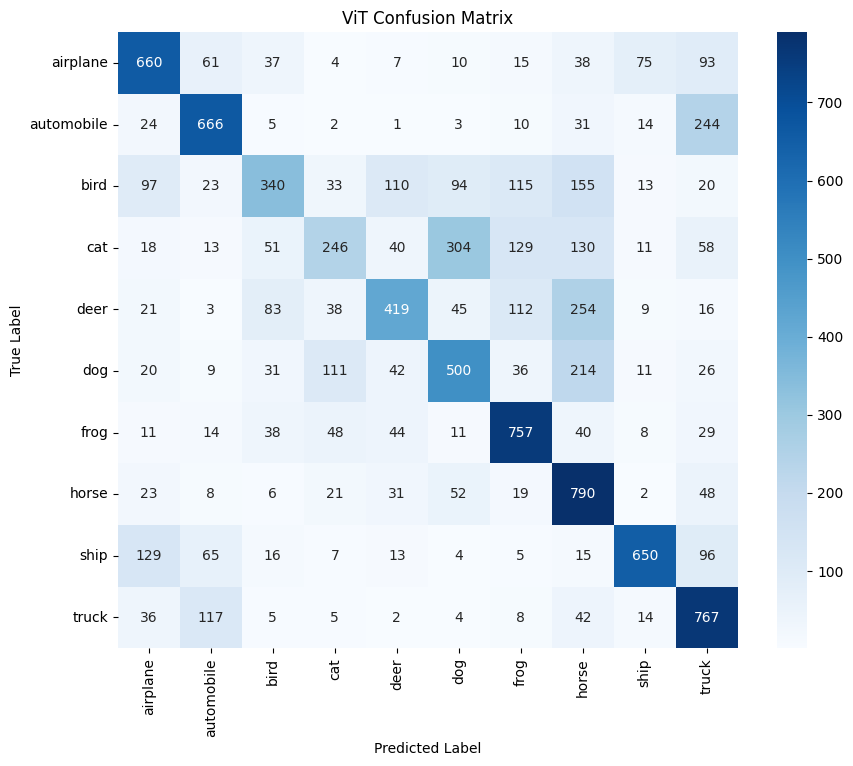

              precision    recall  f1-score   support

    airplane       0.64      0.66      0.65      1000
  automobile       0.68      0.67      0.67      1000
        bird       0.56      0.34      0.42      1000
         cat       0.48      0.25      0.32      1000
        deer       0.59      0.42      0.49      1000
         dog       0.49      0.50      0.49      1000
        frog       0.63      0.76      0.69      1000
       horse       0.46      0.79      0.58      1000
        ship       0.81      0.65      0.72      1000
       truck       0.55      0.77      0.64      1000

    accuracy                           0.58     10000
   macro avg       0.59      0.58      0.57     10000
weighted avg       0.59      0.58      0.57     10000



In [10]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def evaluate_model(model, images, labels):
    # Predictions
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)

    # Confusion matrix
    cm = confusion_matrix(labels, predicted_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Classification report
    print(classification_report(labels, predicted_classes, target_names=class_names))

# Evaluate CNN
print("CNN Evaluation:")
evaluate_model(cnn_model, test_images, test_labels)

# Evaluate ViT
print("ViT Evaluation:")
# Note: ViT outputs logits, need to apply softmax
vit_predictions = tf.nn.softmax(vit_model.predict(test_images)).numpy()
vit_predicted_classes = np.argmax(vit_predictions, axis=1)

cm = confusion_matrix(test_labels, vit_predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('ViT Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print(classification_report(test_labels, vit_predicted_classes, target_names=class_names))

In [12]:
from transformers import ViTFeatureExtractor, TFViTForImageClassification
import tensorflow as tf

# Load pre-trained ViT (small version for CIFAR-10)
model_name = 'google/vit-base-patch16-224-in21k'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)

# Resize images to 224x224 (required by this ViT)
def resize_images(images):
    return tf.image.resize(images, [224, 224])

train_images_resized = resize_images(train_images)
test_images_resized = resize_images(test_images)

# Convert to ViT input format
def preprocess_images(images):
    return feature_extractor(images.numpy(), return_tensors="np")['pixel_values']

# Prepare datasets
train_dataset = tf.data.Dataset.from_tensor_slices(
    (train_images_resized, train_labels)).batch(32).map(
    lambda x, y: (tf.py_function(preprocess_images, [x], [tf.float32])[0], y),
    num_parallel_calls=tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices(
    (test_images_resized, test_labels)).batch(32).map(
    lambda x, y: (tf.py_function(preprocess_images, [x], [tf.float32])[0], y),
    num_parallel_calls=tf.data.AUTOTUNE)

# Load pre-trained model
pretrained_vit = TFViTForImageClassification.from_pretrained(
    model_name,
    num_labels=10,
    ignore_mismatched_sizes=True  # Because we're changing the output layer
)

# Freeze all layers except the classification head
for layer in pretrained_vit.vit.encoder.layer:
    layer.trainable = False

# Compile model
pretrained_vit.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train the model
pretrained_history = pretrained_vit.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=20,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate
pretrained_predictions = pretrained_vit.predict(test_dataset)
pretrained_predicted_classes = np.argmax(pretrained_predictions.logits, axis=1)

print("Pre-trained ViT Evaluation:")
print(classification_report(test_labels, pretrained_predicted_classes, target_names=class_names))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


ResourceExhaustedError: {{function_node __wrapped__ResizeBilinear_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[50000,224,224,3] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:ResizeBilinear] name: 

In [13]:
# Function to get evaluation metrics
def get_metrics(model, images, labels):
    if isinstance(model, type(pretrained_vit)):  # Hugging Face model
        predictions = model.predict(images)
        predicted_classes = np.argmax(predictions.logits, axis=1)
        accuracy = np.mean(predicted_classes == labels.flatten())
    else:
        _, accuracy = model.evaluate(images, labels, verbose=0)
        predictions = model.predict(images)
        if predictions.shape[1] == 1:  # For ViT with logits
            predictions = tf.nn.softmax(predictions).numpy()
        predicted_classes = np.argmax(predictions, axis=1)

    report = classification_report(labels, predicted_classes, output_dict=True)
    return {
        'accuracy': accuracy,
        'precision': report['macro avg']['precision'],
        'recall': report['macro avg']['recall'],
        'f1': report['macro avg']['f1-score']
    }

# Get metrics for all models
cnn_metrics = get_metrics(cnn_model, test_images, test_labels)
vit_metrics = get_metrics(vit_model, test_images, test_labels)
pretrained_vit_metrics = get_metrics(pretrained_vit, test_dataset, test_labels)

# Create comparison table
import pandas as pd

comparison = pd.DataFrame({
    'CNN': cnn_metrics,
    'ViT (from scratch)': vit_metrics,
    'ViT (pre-trained)': pretrained_vit_metrics
}).T

print("Model Performance Comparison:")
print(comparison)

NameError: name 'pretrained_vit' is not defined

In [14]:
# Calculate parameters
cnn_params = cnn_model.count_params()
vit_params = vit_model.count_params()
pretrained_vit_params = pretrained_vit.num_parameters()

# Create comparison table
complexity_comparison = pd.DataFrame({
    'Model': ['CNN', 'ViT (from scratch)', 'ViT (pre-trained)'],
    'Parameters': [cnn_params, vit_params, pretrained_vit_params],
    'Training Time (epochs)': [
        len(cnn_history.history['loss']),
        len(vit_history.history['loss']),
        len(pretrained_history.history['loss'])
    ],
    'Final Val Accuracy': [
        cnn_history.history['val_accuracy'][-1],
        vit_history.history['val_accuracy'][-1],
        pretrained_history.history['val_accuracy'][-1]
    ]
})

print("\nModel Complexity and Training Efficiency:")
print(complexity_comparison)

NameError: name 'pretrained_vit' is not defined

In [15]:
# Function to visualize attention (for ViT model)
def visualize_attention(model, image, patch_size=4):
    # Get the transformer encoder output
    transformer_layers = [layer for layer in model.layers if isinstance(layer, TransformerBlock)]
    last_transformer = transformer_layers[-1]

    # Create a model that outputs attention weights
    attention_model = tf.keras.Model(
        inputs=model.inputs,
        outputs=last_transformer.att.get_attention_scores()
    )

    # Get attention scores
    image = np.expand_dims(image, axis=0)
    attention_scores = attention_model.predict(image)

    # Average attention across heads
    avg_attention = np.mean(attention_scores, axis=1)[0]

    # Reshape attention to match patches
    num_patches = int((32 / patch_size) ** 2)
    attention_map = avg_attention[:num_patches, :num_patches]

    # Visualize
    plt.figure(figsize=(10, 8))
    plt.imshow(attention_map, cmap='viridis')
    plt.colorbar()
    plt.title("Attention Map")
    plt.xlabel("Query Patch")
    plt.ylabel("Key Patch")
    plt.show()

# Visualize for a sample image
sample_image = test_images[0]
visualize_attention(vit_model, sample_image)

AttributeError: 'MultiHeadAttention' object has no attribute 'get_attention_scores'

CNN Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


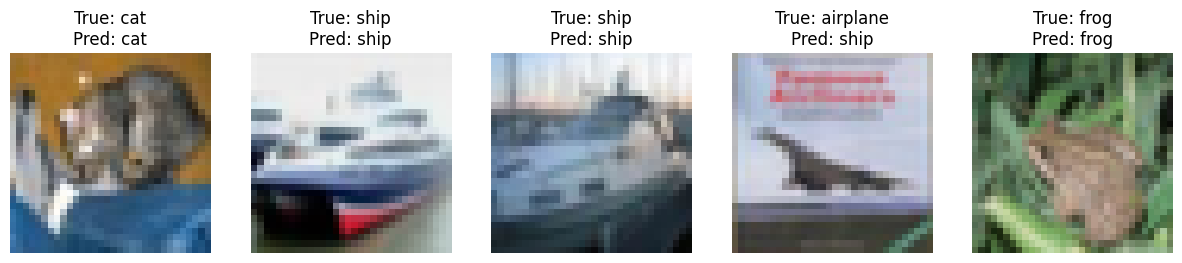

ViT Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


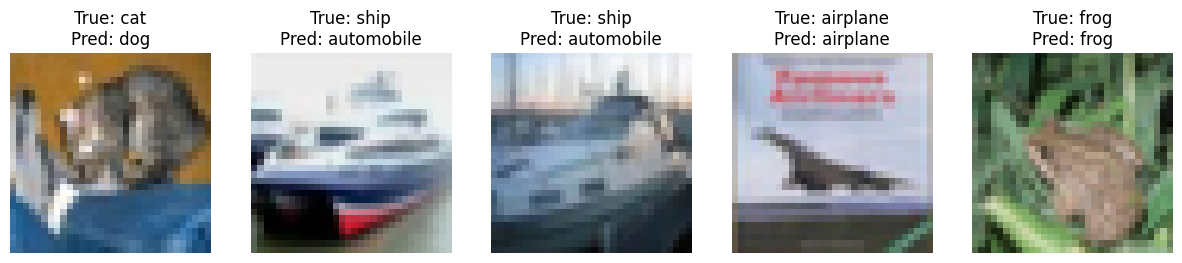

It looks like you are trying to rescale already rescaled images. If the input images have pixel values between 0 and 1, set `do_rescale=False` to avoid rescaling them again.


Pre-trained ViT Predictions:


NameError: name 'pretrained_vit' is not defined

In [16]:
# Function to display sample predictions
def display_predictions(model, images, labels, num_samples=5):
    plt.figure(figsize=(15, 5))
    predictions = model.predict(images[:num_samples])

    if predictions.shape[1] == 1:  # ViT logits case
        predictions = tf.nn.softmax(predictions).numpy()

    predicted_classes = np.argmax(predictions, axis=1)

    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i])
        plt.title(f"True: {class_names[labels[i][0]]}\nPred: {class_names[predicted_classes[i]]}")
        plt.axis('off')
    plt.show()

# CNN predictions
print("CNN Predictions:")
display_predictions(cnn_model, test_images, test_labels)

# ViT predictions
print("ViT Predictions:")
display_predictions(vit_model, test_images, test_labels)

# Pre-trained ViT predictions (need to resize)
print("Pre-trained ViT Predictions:")
sample_images_resized = resize_images(test_images[:5])
sample_input = feature_extractor(sample_images_resized.numpy(), return_tensors="np")['pixel_values']
predictions = pretrained_vit(sample_input).logits
predicted_classes = np.argmax(predictions, axis=1)

plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"True: {class_names[test_labels[i][0]]}\nPred: {class_names[predicted_classes[i]]}")
    plt.axis('off')
plt.show()